# Titanic Machine Learning Project

The goal of this project is to build a machine learning model that predicts which passengers survived the Titanic with the greatest possible accuracy.

## 1. Imports and Data Cleaning

In this section, I import the data and clean it to prepare it for modeling.

In [68]:
import matplotlib.pyplot as plt

import pandas as pd

import seaborn as sns

from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, RocCurveDisplay, log_loss
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

In [2]:
train_df = pd.read_csv('Data/train.csv')

In [3]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
test_df = pd.read_csv('Data/test.csv')

In [5]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Only 38% of passengers survived.

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train_df.drop('Cabin',inplace=True,axis=1)

In [9]:
test_df.drop('Cabin',inplace=True,axis=1)

### 1a. Cleaning Age Null Values

First, I review some of the records that contain null values for age to see what comes to light.

In [10]:
train_df[train_df['Age'].isna()].head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,C
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,Q
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,C
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,C


The titles of the passengers stand out. Females have either a Miss or Mrs title and males have either a Mr or Master title. These offer general indications of passenger age, so I use them to approximate the ages of the passengers that have null values for age.

In [11]:
master_df = train_df[train_df['Name'].str.contains('master', case=False)]

In [12]:
master_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,40.000000,40.000000,40.000000,36.000000,40.000000,40.000000,40.000000
mean,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,34.703125
std,301.717518,0.500641,0.627878,3.619872,1.910833,0.540062,28.051752
min,8.000000,0.000000,1.000000,0.420000,0.000000,0.000000,8.516700
25%,165.750000,0.000000,2.000000,1.000000,1.000000,1.000000,18.750000
50%,345.000000,1.000000,3.000000,3.500000,1.000000,1.000000,29.062500
75%,764.000000,1.000000,3.000000,8.000000,4.000000,2.000000,39.171875
max,870.000000,1.000000,3.000000,12.000000,8.000000,2.000000,151.550000


The median age for passengers with the title 'master' is 3.5. I find the median age for the remaining three titles and use those values to fill the nulls for those categories.

In [13]:
miss_df = train_df[train_df['Name'].str.contains('Miss', case=False)]

In [14]:
miss_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,182.000000,182.000000,182.000000,146.000000,182.000000,182.000000,182.000000
mean,408.884615,0.697802,2.307692,21.773973,0.714286,0.549451,43.797873
std,246.775812,0.460477,0.849989,12.990292,1.431961,0.804184,66.027199
min,3.000000,0.000000,1.000000,0.750000,0.000000,0.000000,6.750000
25%,213.000000,0.000000,1.250000,14.125000,0.000000,0.000000,7.951050
50%,381.500000,1.000000,3.000000,21.000000,0.000000,0.000000,15.620850
75%,612.250000,1.000000,3.000000,30.000000,1.000000,1.000000,41.034400
max,889.000000,1.000000,3.000000,63.000000,8.000000,2.000000,512.329200


In [15]:
mrs_df = train_df[train_df['Name'].str.contains('Mrs', case=False)]

In [16]:
mrs_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,129.000000,129.000000,129.000000,112.000000,129.000000,129.000000,129.000000
mean,453.806202,0.790698,1.984496,35.642857,0.682171,0.806202,44.731944
std,268.570873,0.408397,0.819532,11.506251,0.599277,1.262918,45.127354
min,2.000000,0.000000,1.000000,14.000000,0.000000,0.000000,7.225000
25%,255.000000,1.000000,1.000000,27.000000,0.000000,0.000000,15.850000
50%,438.000000,1.000000,2.000000,35.000000,1.000000,0.000000,26.000000
75%,679.000000,1.000000,3.000000,44.000000,1.000000,1.000000,55.900000
max,886.000000,1.000000,3.000000,63.000000,3.000000,6.000000,247.520800


In [17]:
mr_df = train_df[train_df['Name'].str.contains('Mr', case=False)]

In [18]:
mr_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,647.000000,647.000000,647.000000,511.000000,647.000000,647.000000,647.000000
mean,454.585781,0.284389,2.323029,33.118395,0.367852,0.282844,28.537305
std,256.402949,0.451472,0.830426,12.525001,0.797103,0.782193,45.207127
min,1.000000,0.000000,1.000000,11.000000,0.000000,0.000000,0.000000
25%,230.000000,0.000000,2.000000,24.000000,0.000000,0.000000,7.895800
50%,464.000000,0.000000,3.000000,31.000000,0.000000,0.000000,13.000000
75%,674.500000,1.000000,3.000000,40.000000,1.000000,0.000000,27.750000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [19]:
train_df.loc[train_df['Name'].str.contains('Master', case=False), 'Age'] = train_df.loc[train_df['Name'].str.contains('Master', case=False), 'Age'].fillna(3.5)
train_df.loc[train_df['Name'].str.contains('Miss', case=False), 'Age'] = train_df.loc[train_df['Name'].str.contains('Miss', case=False), 'Age'].fillna(21)
train_df.loc[train_df['Name'].str.contains('Mrs', case=False), 'Age'] = train_df.loc[train_df['Name'].str.contains('Mrs', case=False), 'Age'].fillna(35)
train_df.loc[train_df['Name'].str.contains('Mr', case=False), 'Age'] = train_df.loc[train_df['Name'].str.contains('Mr', case=False), 'Age'].fillna(31)

In [20]:
test_df.loc[test_df['Name'].str.contains('Master', case=False), 'Age'] = test_df.loc[test_df['Name'].str.contains('Master', case=False), 'Age'].fillna(3.5)
test_df.loc[test_df['Name'].str.contains('Miss', case=False), 'Age'] = test_df.loc[test_df['Name'].str.contains('Miss', case=False), 'Age'].fillna(21)
test_df.loc[test_df['Name'].str.contains('Mrs', case=False), 'Age'] = test_df.loc[test_df['Name'].str.contains('Mrs', case=False), 'Age'].fillna(35)
test_df.loc[test_df['Name'].str.contains('Mr', case=False), 'Age'] = test_df.loc[test_df['Name'].str.contains('Mr', case=False), 'Age'].fillna(31)

In [21]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          890 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


There is still one null value.

In [22]:
train_df[train_df['Age'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
766,767,0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6,C


I use the same age as the one I did for Mr. for this final passenger.

In [23]:
train_df['Age'].fillna(31,inplace=True)

In [24]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [25]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          417 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [26]:
test_df[test_df['Age'].isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
88,980,3,"O'Donoghue, Ms. Bridget",female,NaN,0,0,364856,7.75,Q


In [27]:
test_df['Age'].fillna(21,inplace=True)

The final null values come from the Embarked column for the train data and the fare data for the test data.

### 1c. Cleaning null values in the Embarked and Fare columns

The Embarked column shows the port of embarkment for each passenger. I add these passengers to the most common port.

In [28]:
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [29]:
train_df[train_df['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [30]:
train_df['Embarked'].fillna('S',inplace=True)

In [31]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [32]:
test_df[test_df['Fare'].isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


In [33]:
train_df[train_df['Pclass'] == 3].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,491.000000,491.000000,491.0,491.000000,491.000000,491.000000,491.000000
mean,439.154786,0.242363,3.0,25.940774,0.615071,0.393075,13.675550
std,264.441453,0.428949,0.0,11.190488,1.374883,0.888861,11.778142
min,1.000000,0.000000,3.0,0.420000,0.000000,0.000000,0.000000
25%,200.000000,0.000000,3.0,20.000000,0.000000,0.000000,7.750000
50%,432.000000,0.000000,3.0,27.000000,0.000000,0.000000,8.050000
75%,666.500000,0.000000,3.0,31.000000,1.000000,0.000000,15.500000
max,891.000000,1.000000,3.0,74.000000,8.000000,6.000000,69.550000


In [34]:
test_df['Fare'].fillna(8.05,inplace=True)

In [35]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


Hooray! There are no more null values. The next step is preparing for modeling.

## 2. Data Preparation

First, I drop columns with no predictive value.

In [36]:
train_df_filtered = train_df.drop(['PassengerId','Name','Ticket'], axis = 1)
test_df_filtered = test_df.drop(['PassengerId','Name','Ticket'], axis = 1)

Now I define the X and Y .

In [37]:
X_train = train_df_filtered.drop(['Survived'], axis=1)
y_train = train_df_filtered['Survived']
X_test = test_df_filtered

Next, I define which columns need one hot encoding and which are already numerical.

In [52]:
ohecols = ['Sex','Embarked']

In [53]:
numcols = ['Pclass','Age','SibSp','Parch','Fare']

In [54]:
onehot = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [55]:
ohe_sub = Pipeline([
    ('cat_impute', SimpleImputer(strategy='most_frequent')),
    ('ohe', onehot)
])

In [56]:
num_sub = Pipeline([
    ('cat_impute', SimpleImputer(strategy='most_frequent'))
])

In [57]:
CT = ColumnTransformer(transformers=[
    ('onehot', ohe_sub, ohecols),
    ('numerical', num_sub, numcols)
])

## 3. Modeling

In [58]:
dum_pipe = Pipeline(steps=[
    ('ct', CT),
    ('dummy', DummyClassifier(strategy='most_frequent'))
])

In [59]:
dum_pipe.fit(X_train, y_train)

C:\Users\Hendricks\anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('onehot',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Sex', 'Embarked']),
                                                 ('numerical',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['Pclass', 'Age', 'SibSp',
                                                   'Parch', 'Fare'])])),
                ('dummy', DummyClassifier(strategy='most_frequent'))])

In [60]:
print(classification_report(y_train, dum_pipe.predict(X_train)))

              precision    recall  f1-score   support

           0       0.62      1.00      0.76       549
           1       0.00      0.00      0.00       342

    accuracy                           0.62       891
   macro avg       0.31      0.50      0.38       891
weighted avg       0.38      0.62      0.47       891



C:\Users\Hendricks\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hendricks\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hendricks\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

### 3b. Logistic Regression

In [79]:
lr_pipe = Pipeline(steps=[
    ('ct', CT),
    ('lr', LogisticRegression(max_iter=1000))
])

In [81]:
lr_pipe.fit(X_train, y_train)

C:\Users\Hendricks\anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('onehot',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Sex', 'Embarked']),
                                                 ('numerical',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['Pclass', 'Age', 'SibSp',
                                                   'Parch', 'Fare'])])),
                ('lr', LogisticRegression(max_iter=1000))])

In [82]:
print(classification_report(y_train, lr_pipe.predict(X_train)))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       549
           1       0.76      0.70      0.73       342

    accuracy                           0.80       891
   macro avg       0.79      0.78      0.79       891
weighted avg       0.80      0.80      0.80       891



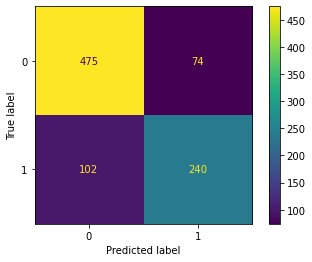

In [83]:
ConfusionMatrixDisplay.from_estimator(lr_pipe, X_train, y_train);

In [84]:
params = {
    'fsm__max_iter' : [10, 100, 1000, 10000],
    'fsm__C' : [0.0001, 0.001, 0.01, 0.1, 1],
    'fsm__tol' : [0.0001,0.001,0.01,0.1],
    'fsm__penalty' : ['l2','none'],
    'fsm__class_weight' : [None,'balanced']
}

In [86]:
gs = GridSearchCV(
    estimator = lr_pipe,
    param_grid = params,
    cv = 5,
    verbose = 1
)

In [ ]:
#gs.fit(X,y)

In [ ]:
#gs.best_params_

In [92]:
lr_gs_pipe = Pipeline(steps=[
    ('ct', CT),
    ('lr', LogisticRegression(C = .1,
                               class_weight = None,
                               max_iter=100,
                               penalty = 'l2',
                               tol = .0001))
])

In [93]:
lr_gs_pipe.fit(X_train,y_train)

C:\Users\Hendricks\anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Hendricks\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('onehot',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Sex', 'Embarked']),
                                                 ('numerical',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['Pclass', 'Age', 'SibSp',
                                                   'Parch', 'Fare'])])),
                ('lr', LogisticRegression(C=0.1))])

In [94]:
print(classification_report(y_train, lr_gs_pipe.predict(X_train)))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       549
           1       0.79      0.69      0.74       342

    accuracy                           0.81       891
   macro avg       0.81      0.79      0.79       891
weighted avg       0.81      0.81      0.81       891



In [96]:
lr_coefs = lr_gs_pipe.named_steps['lr'].coef_

In [100]:
lr_coefs

array([[ 1.28634443, -0.85397453,  0.19787203,  0.30847988, -0.07398201,
        -0.87802501, -0.03232665, -0.30086049,  0.00459519,  0.00390489]])

In [102]:
X_transformed = CT.fit_transform(X_train)

C:\Users\Hendricks\anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [103]:
X_transformed

array([[ 0.    ,  1.    ,  0.    , ...,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  0.    ,  1.    , ...,  1.    ,  0.    , 71.2833],
       [ 1.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  7.925 ],
       ...,
       [ 1.    ,  0.    ,  0.    , ...,  1.    ,  2.    , 23.45  ],
       [ 0.    ,  1.    ,  1.    , ...,  0.    ,  0.    , 30.    ],
       [ 0.    ,  1.    ,  0.    , ...,  0.    ,  0.    ,  7.75  ]])

In [104]:
feature_names = CT.named_transformers_['onehot'].get_feature_names_out(input_features=ohecols)

In [112]:
postohecols = feature_names.tolist()

In [113]:
allcols = postohecols + numcols

In [114]:
lr_feature_importance_df = pd.DataFrame(lr_coefs, columns = allcols)

In [115]:
lr_feature_importance_df

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass,Age,SibSp,Parch,Fare
0,1.286344,-0.853975,0.197872,0.30848,-0.073982,-0.878025,-0.032327,-0.30086,0.004595,0.003905


In [116]:
second_row = (lr_feature_importance_df.iloc[0] - 1) * 100

In [117]:
lr_feature_importance_df = lr_feature_importance_df.append(second_row,ignore_index = True)

In [118]:
lr_feature_importance_df

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass,Age,SibSp,Parch,Fare
0,1.286344,-0.853975,0.197872,0.308480,-0.073982,-0.878025,-0.032327,-0.300860,0.004595,0.003905
1,28.634443,-185.397453,-80.212797,-69.152012,-107.398201,-187.802501,-103.232665,-130.086049,-99.540481,-99.609511


# Ideas for next time: create features for titles (master, mister, etc.); make features with gender and class; make feature with age and fare; look into the sibling and parent stuff more; build a stack of models